In [2]:
%pylab
%matplotlib inline
import numpy as np
from scipy.fftpack import fft, fftshift
import time
time_start=time.time()

dt = 0.6
w0 = 0.057
w1 = 0.114
Up0 = 0.5 + 3.17 * 0.08 **2 /(4 * w0**2)
T_100=0.0151992
T_70=0.0106394
T_50=0.0075996
T_10=0.00151992
T_5=0.00075996
N=40
pp_tds_x = []
pp_tds_y = []
TDS_x = zeros((N, N))
TDS_y = zeros((N, N))
TDS_sum = zeros((N, N), dtype=complex)
mod_TDS_sum = []
pp_TDS_sum = [] 
angle_max_TDS_sum = []
for i in range(N):    
    for j in range(N):
        path='./HHG_%d_%d.dat' % (i,j)
        data = loadtxt(path)
        time, Dx, Dy = data [:, 0],data[:, 5], data[:, 6]
        nt = len(Dx.size)
        Dx_1 = zeros(nt)
        Dy_1 = zeros(nt)
        Dx_1[-1] = ((Dx[-1]-Dx[-2])/dt)
        Dy_1[-1] = ((Dy[-1]-Dy[-2])/dt)
        for m in range(nt-1):
            Dx_1[m]=((Dx[m+1]-Dx[m])/dt)
            Dy_1[m]=((Dy[m+1]-Dy[m])/dt)

        Dx_2=zeros(nt)
        Dy_2=zeros(nt)
        Dx_2[-1]=((Dx_1[-1]-Dx_1[-2])/dt)
        Dy_2[-1]=((Dy_1[-1]-Dy_1[-2])/dt)
        for n in range(nt-1):
            Dx_2[n]=((Dx_1[n+1]-Dx_1[n])/dt)
            Dy_2[n]=((Dy_1[n+1]-Dy_1[n])/dt)
        
        #补零
        mul = 7*nt
        Dx_ext = np.pad(Dx_2, (mul, mul), 'constant')
        Dy_ext = np.pad(Dy_2, (mul, mul), 'constant')
        #time_ext=linspace(-(mul+0.5)*len(time)*dt,(mul+0.5)*len(time)*dt,Dy_ext.size)
        
        fre_x=fft(2 * Dx_ext)
        fre_y=fft(2 * Dy_ext)
        #傅里叶变换后，取其低频部分（100THz：0.0151992以下）
        Dx_thz = zeros(Dx_ext.size, complex)
        Dy_thz = zeros(Dy_ext.size, complex)
        con_1=int(T_100/(2*pi*(1/(len(time_ext)*dt)))+1)
        con_2=int(T_100/(2*pi*(1/(len(time_ext)*dt))))
        Dx_thz[0:con_1]=fre_x[0:con_1]
        Dy_thz[0:con_1]=fre_y[0:con_1]
        Dx_thz[(Dx_ext.size-con_2):Dx_ext.size]=fre_x[(Dx_ext.size-con_2):Dx_ext.size]
        Dy_thz[(Dx_ext.size-con_2):Dx_ext.size]=fre_y[(Dx_ext.size-con_2):Dx_ext.size]

        tds_x = ifft(Dx_thz)
        tds_y = ifft(Dy_thz)
        
        if argmax(tds_x) > argmin(tds_x):
            pp_tds_x.append(max(tds_x)-min(tds_x))
        else:
            pp_tds_x.append(min(tds_x)-max(tds_x))
        if argmax(tds_y) > argmin(tds_y):
            pp_tds_y.append(max(tds_y)-min(tds_y))
        else:
            pp_tds_y.append(min(tds_y)-max(tds_y))
        
        TDS_sum[i,j] = tds_y + tds_x*1j
        for k in range(len(tds_x)):
            if angle(TDS_sum[i,k,j])<0:
                mod_TDS_sum[i,k,j]=-abs(TDS_sum[i,k,j])
            else:
                mod_TDS_sum[i,k,j]=abs(TDS_sum[i,k,j])
        if argmax(mod_TDS_sum[i,:,j])> argmin(mod_TDS_sum[i,:,j]):
            pp_TDS_sum[j,i]=(max(mod_TDS_sum[i,:,j])-min(mod_TDS_sum[i,:,j]))
        else:
            pp_TDS_sum[j,i]=(min(mod_TDS_sum[i,:,j])-max(mod_TDS_sum[i,:,j]))
        no=argmax(abs(TDS_sum[i,:,j]))
        angle_max_TDS_sum[j,i]=angle(TDS_sum[i,no,j])    
        TDS_x[i,:,j]=tds_x
        TDS_y[i,:,j]=tds_y

import time        
time_end = time.time()
print ('Operation time is:',(time_end-time_start)/60 ,'min.')

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


D:\anaconda\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['fft']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


OSError: ./HHG_0_0.dat not found.

<Figure size 432x288 with 0 Axes>

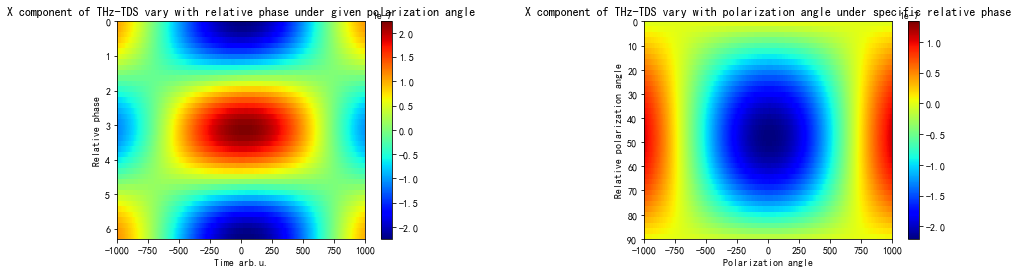

In [6]:
#特定偏振角度下，水平分量THz-TDS随相对相位的变化
figure()
figure(figsize=(15,4))
subplot(121)
scale=[-61512.3,61512.3,2*pi,0]
imshow(TDS_x[:,:,19],extent=scale,aspect='auto',cmap="jet")
xlim(-1000,1000)
xlabel('Time arb.u.')
ylabel('Relative phase')
title('X component of THz-TDS vary with relative phase under given polarization angle')
colorbar()

#特定相对相位下，水平分量THz-TDS随偏振角度的变化
subplot(122)
scale=[-61512.3,61512.3,90,0]
imshow(transpose(TDS_x[1,:,:]),extent=scale,aspect='auto',cmap="jet")
xlim(-1000,1000)
xlabel('Polarization angle')
ylabel('Relative polarization angle')
title('X component of THz-TDS vary with polarization angle under specific relative phase')
colorbar()
subplots_adjust(wspace=0.7)

<Figure size 432x288 with 0 Axes>

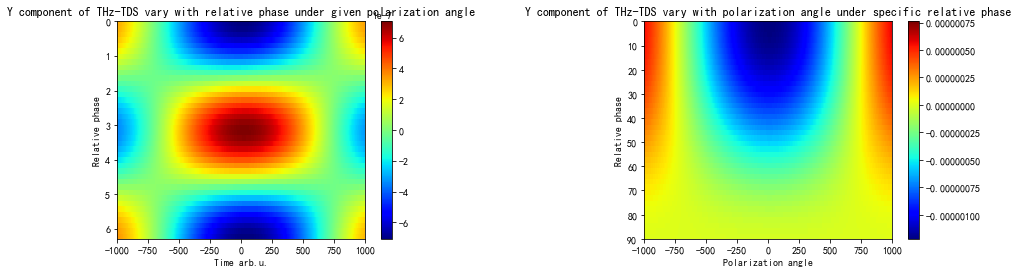

In [7]:
#特定偏振角度下，垂直分量THz-TDS随相对相位的变化
figure()
figure(figsize=(15,4))
subplot(121)
scale=[-61512.3,61512.3,2*pi,0]
imshow(TDS_y[:,:,19],extent=scale,aspect='auto',cmap="jet")
xlim(-1000,1000)
xlabel('Time arb.u.')
ylabel('Relative phase')
title('Y component of THz-TDS vary with relative phase under given polarization angle')
colorbar()

#特定相对相位下，垂直分量THz-TDS随偏振角度的变化
subplot(122)
scale=[-61512.3,61512.3,90,0]
imshow(transpose(TDS_y[1,:,:]),extent=scale,aspect='auto',cmap="jet")
xlim(-1000,1000)
xlabel('Polarization angle')
ylabel('Relative phase')
title('Y component of THz-TDS vary with polarization angle under specific relative phase')
colorbar()
subplots_adjust(wspace=0.7)

<Figure size 432x288 with 0 Axes>

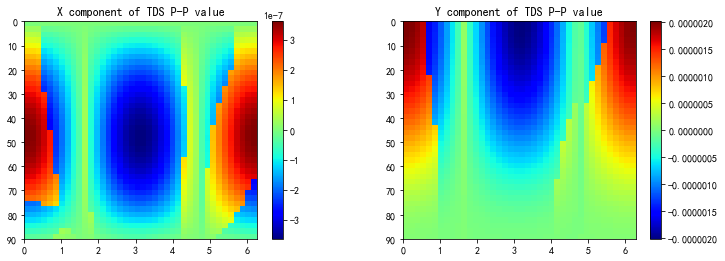

In [8]:
#水平分量TDS强度最大值随相对相位以及偏振角度的变化，横轴是相对相位，纵轴是偏振角度
figure()
figure(figsize=(12,4))
subplot(121)
extent=[0,2*pi,90,0]
imshow(pp_tds_x,extent=extent,cmap="jet", aspect='auto')
colorbar()
title('X component of TDS P-P value')

#垂直分量TDS强度最大值随相对相位以及偏振角度的变化，横轴是相对相位，纵轴是偏振角度
subplot(122)
extent=[0,2*pi,90,0]
imshow(pp_tds_y,extent=extent,cmap="jet", aspect='auto')
colorbar()
title('Y component of TDS P-P value')
subplots_adjust(wspace=0.3)

Text(0.5,1,'angle_max_TDS_sum')

<Figure size 432x288 with 0 Axes>

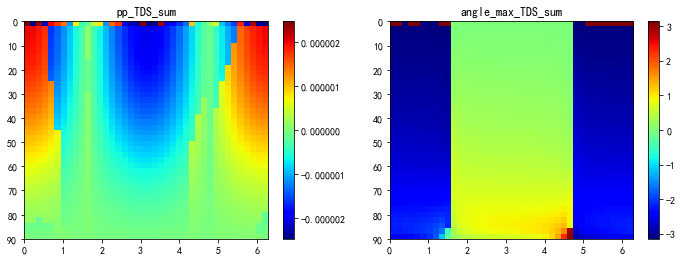

In [9]:
figure()
figure(figsize=(12,4))
subplot(121)
extent=[0,2*pi,90,0]
imshow(pp_TDS_sum,extent=extent,cmap="jet", aspect='auto')
colorbar()
title('pp_TDS_sum')
subplot(122)
extent=[0,2*pi,90,0]
imshow(angle_max_TDS_sum,extent=extent,cmap="jet", aspect='auto')
colorbar()
title('angle_max_TDS_sum')

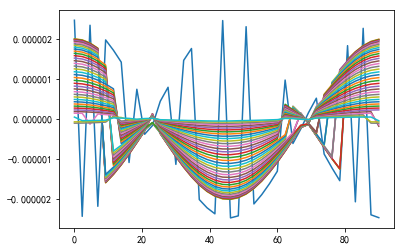

In [13]:
ang=linspace(0,90,40)
for l in range(40): 
    plot(ang,pp_TDS_sum[l,:])

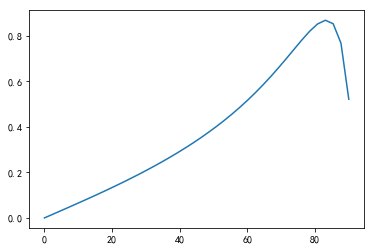

In [14]:
plot(ang,angle_max_TDS_sum[:,13])

In [2]:
import numpy as np
np.zeros((2,2),dtype=complex)

array([[0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j]])